In [38]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [39]:
auto_df = pd.read_csv('Automobile.csv')

auto_df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


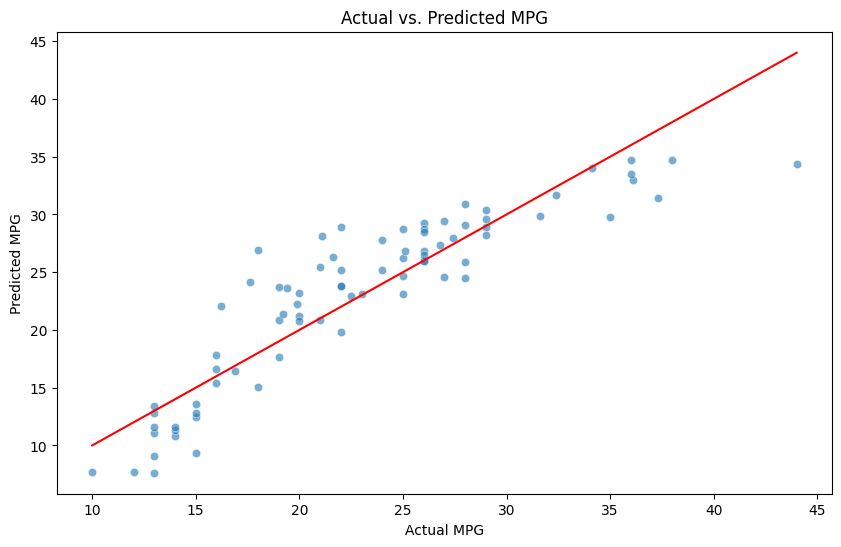

(10.502370329417303,
 0.7942349075428591,
 394    9.626574
 111    8.884108
 270    7.039500
 389    6.904627
 366    6.582221
 Name: mpg, dtype: float64)

In [40]:
auto_df_clean = auto_df.dropna()

# Features and Labels
features = auto_df_clean.drop(['mpg', 'name', 'origin'], axis=1)  # Dropping non-numeric and target columns
labels = auto_df_clean['mpg']

# Splitting dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Training
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Predicting and evaluating the model
y_pred = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Identify inaccurate predictions
errors = abs(y_pred - y_test)
worst_predictions = errors.nlargest(5)

# Actual vs Predicted MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red')  # perfect predictions
plt.title('Actual vs. Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

# Performance metrics
mse, r2, worst_predictions


In [41]:

test_with_names = auto_df_clean.loc[y_test.index]
test_with_names['Predicted MPG'] = y_pred

# Calculate prediction errors 
test_with_names['Prediction Error'] = abs(test_with_names['Predicted MPG'] - test_with_names['mpg'])

# top 5 samples with largest prediction errors
top_errors_with_names = test_with_names.nlargest(5, 'Prediction Error')[['name', 'mpg', 'Predicted MPG', 'Prediction Error']]

top_errors_with_names


,name,mpg,Predicted MPG,Prediction Error
394,vw pickup,44.0,34.373426,9.626574
111,maxda rx3,18.0,26.884108,8.884108
270,toyota celica gt liftback,21.1,28.139500,7.039500
389,ford granada l,22.0,28.904627,6.904627
366,chrysler lebaron salon,17.6,24.182221,6.582221


## Predicting Acceleration 

In [42]:
auto_df = auto_df.dropna()
# Features and Labels
features2 = auto_df.drop(columns=['name', 'acceleration', 'origin'])
labels2 = auto_df['acceleration']

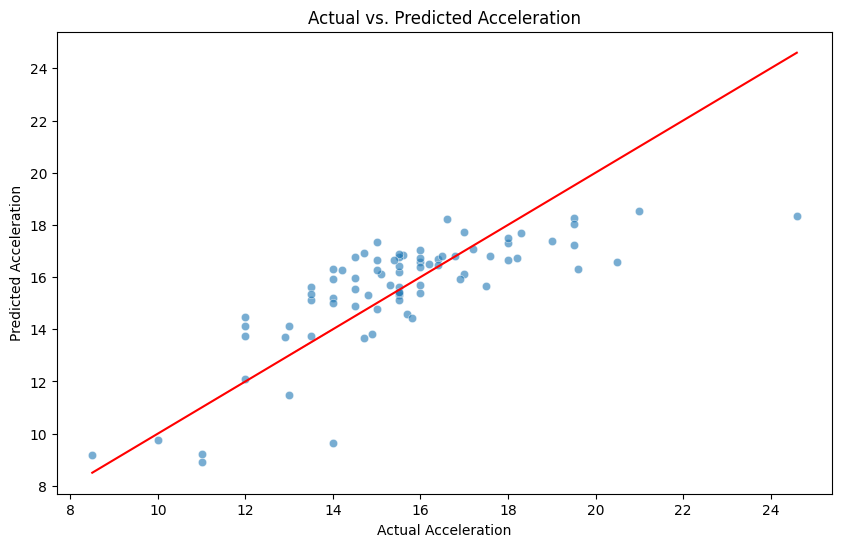

(2.6554353606407815,
 0.5792860069507535,
 394    6.264619
 25     4.369734
 56     3.940082
 367    3.288660
 91     2.479037
 Name: acceleration, dtype: float64)

In [43]:
# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.2, random_state=42)

# Training
lr_model.fit(X_train2, y_train2)

# Predicting and evaluating the model
y_pred2 = lr_model.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_pred2)
r2_new = r2_score(y_test2, y_pred2)



# Identify inaccurate predictions
errors2 = abs(y_pred2 - y_test2)
worst_predictions2 = errors2.nlargest(5)

# Actual vs Predicted MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test2, y=y_pred2, alpha=0.6)
sns.lineplot(x=y_test2, y=y_test2, color='red')  # perfect predictions
plt.title('Actual vs. Predicted Acceleration')
plt.xlabel('Actual Acceleration')
plt.ylabel('Predicted Acceleration')
plt.show()


# Performance metrics
mse2, r2_new, worst_predictions2


In [44]:
test_with_names2 = auto_df.loc[y_test2.index]
test_with_names2['Predicted Acceleration'] = y_pred2

# Calculate prediction errors 
test_with_names2['Prediction Error'] = abs(test_with_names2['Predicted Acceleration'] - test_with_names2['acceleration'])

# top 5 samples with largest prediction errors
top_errors_with_names2 = test_with_names2.nlargest(5, 'Prediction Error')[['name', 'acceleration', 'Predicted Acceleration', 'Prediction Error']]

top_errors_with_names2

,name,acceleration,Predicted Acceleration,Prediction Error
394,vw pickup,24.6,18.335381,6.264619
25,ford f250,14.0,9.630266,4.369734
56,plymouth cricket,20.5,16.559918,3.940082
367,chevrolet cavalier,19.6,16.311340,3.288660
91,chevrolet caprice classic,12.0,14.479037,2.479037


## Clustering


C:\Users\dbc47\AppData\Local\Temp\ipykernel_19216\3466295402.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto_df['horsepower'].fillna(auto_df['horsepower'].median(), inplace=True)


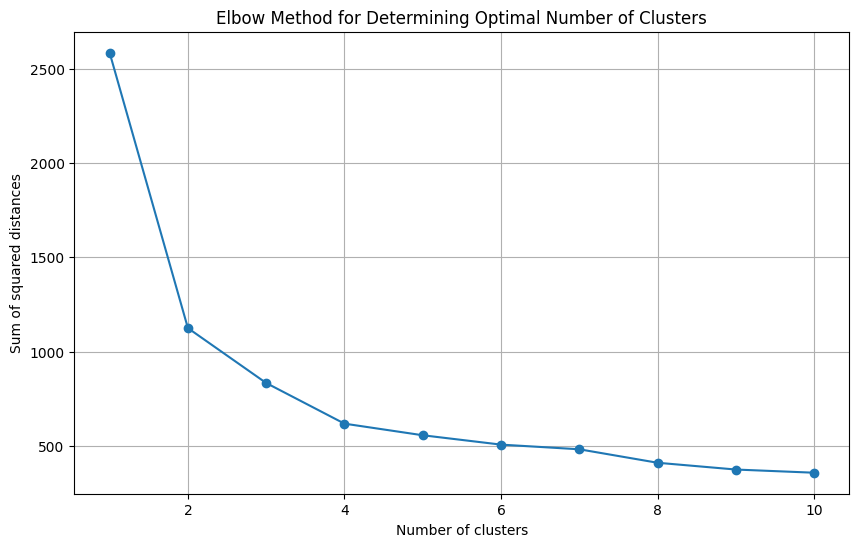

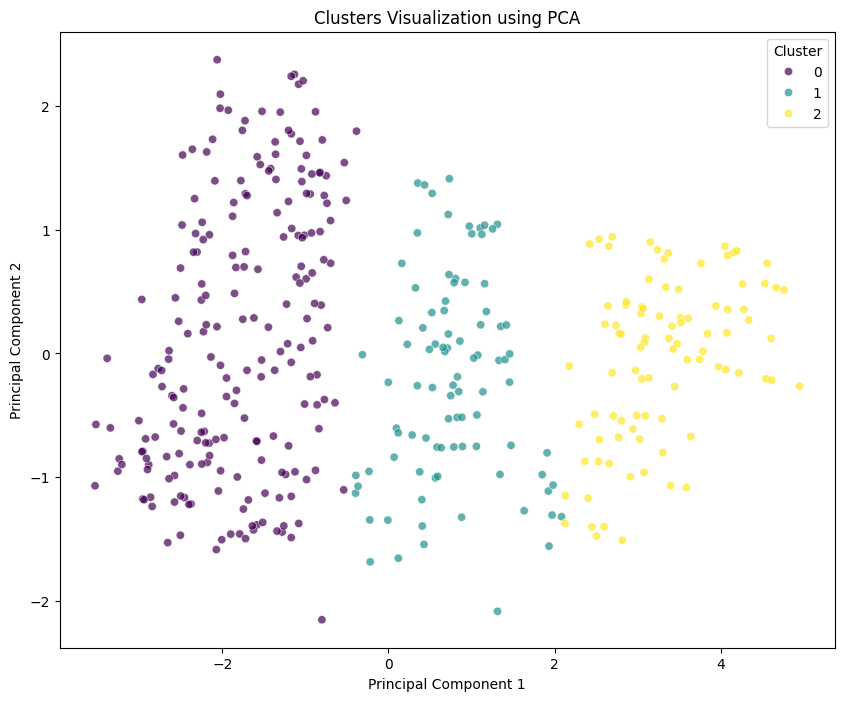

In [45]:

auto_df['horsepower'].fillna(auto_df['horsepower'].median(), inplace=True)

# Encode categorical features
categorical_features = ['origin']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    auto_df[feature] = le.fit_transform(auto_df[feature])
    label_encoders[feature] = le

# Scale numerical variables
numerical_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model_year']
scaler = StandardScaler()
auto_df[numerical_features] = scaler.fit_transform(auto_df[numerical_features])

all_features = numerical_features + categorical_features
feature_data = auto_df[all_features]

# Determine optimal number of clusters 
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_data)
    sse.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.grid(True)
plt.show()

# K-Means clustering 
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(feature_data)
auto_df['Cluster'] = cluster_labels

# PCA 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(auto_df[all_features])


pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = cluster_labels

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Clusters Visualization using PCA')
plt.show()


In [46]:
auto_df.head(30)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Cluster
0,chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,12.0,-1.625315,2,2
1,buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,11.5,-1.625315,2,2
2,plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,11.0,-1.625315,2,2
3,amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,12.0,-1.625315,2,2
4,ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,10.5,-1.625315,2,2
5,ford galaxie 500,-1.083498,1.483947,2.244637,2.433030,1.607198,10.0,-1.625315,2,2
6,chevrolet impala,-1.211785,1.483947,2.483848,3.005320,1.622523,9.0,-1.625315,2,2
7,plymouth fury iii,-1.211785,1.483947,2.349890,2.875254,1.573013,8.5,-1.625315,2,2
8,pontiac catalina,-1.211785,1.483947,2.493416,3.135386,1.706218,10.0,-1.625315,2,2
9,amc ambassador dpl,-1.083498,1.483947,1.871469,2.224924,1.028406,8.5,-1.625315,2,2


Average Acceleration by Cluster:
Cluster
0    16.539234
1    16.181522
2    12.602198
Name: acceleration, dtype: float64


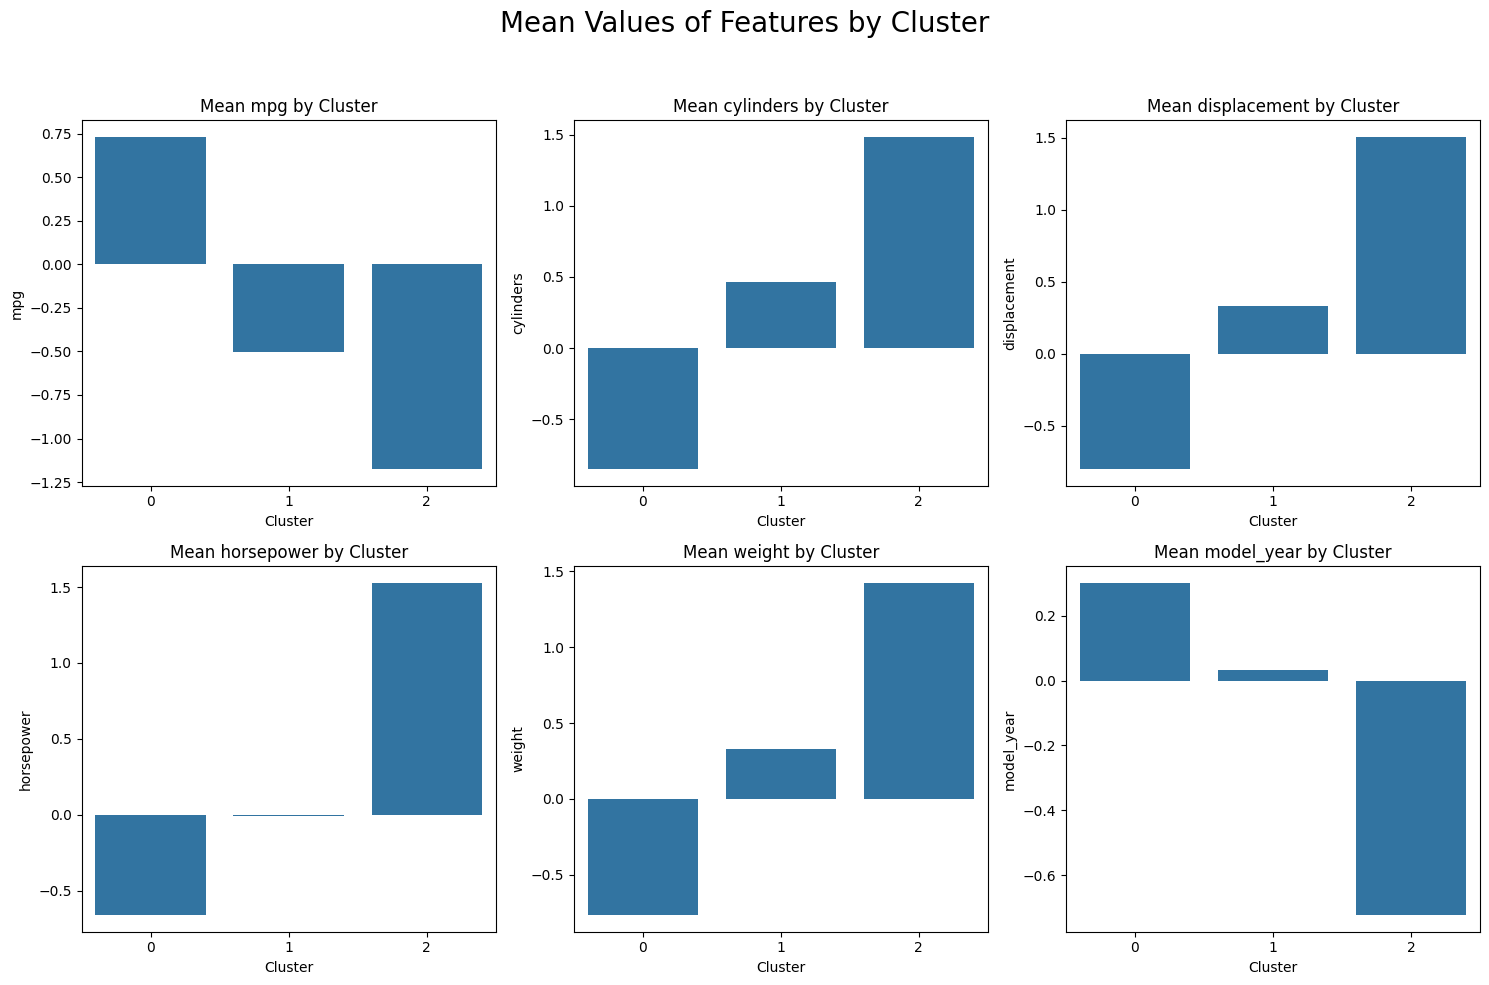

In [47]:
# Calculate average acceleration clusters
avg_acceleration = auto_df.groupby('Cluster')['acceleration'].mean()
print("Average Acceleration by Cluster:")
print(avg_acceleration)
cluster_means = auto_df.groupby('Cluster')[numerical_features].mean()

# Plotting the traits of each cluster
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=cluster_means.index, y=cluster_means[feature])
    plt.title(f'Mean {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.suptitle('Mean Values of Features by Cluster', size=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()